# Objetive: Risk and Return for Ticker Stocks given.  Markowitz efficient frontier is calculated. This script is for one date range.

## Author: Pablo Calatayud
## Email: pablocalatayudpelayo@gmail.com
## git-hub: pcalatayud-prog
## Linkedin; https://www.linkedin.com/in/pablo-calatayud-pelayo/


### input:
   * start_day: Initial Day for the historical retrieve of data
   
   * end_day: Last Day for the historical data
   
   * Ticker Filename:
           * Nasdaq-list -> nasdaq_list.csv
           * S&P500 -> sp_500.csv
           * Nasdaq-100 -> nq_100.csv
           
           
   
### OUTPUT:
   * df_markowitz: Markowitz efficient frontier data for the historical data selected
   
   * df_Index: Lata Frame for all the sp500 with the risk/return data for the historical data selected


#### Daily time frame was choose

### 0. Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

import Return_Risk_Markowitz as rrm

### 1. Selecting File & building Data Frame Tickers

In [2]:
#1. Nasdaq Tickers
filename_nasdaq_index ="nasdaq_list.csv"
tickers_nasdaq_index = pd.read_csv(filename_nasdaq_index)
ticker_nasdaq_index_list = list(tickers_nasdaq_index["ticker"])
ticker_nasdaq_index_list

#2. S&P 500 Tickers
filename_sp500 ="sp_500.csv"
tickers_sp500 = pd.read_csv(filename_sp500)
ticker_sp500_list = list(tickers_sp500["ticker"])


#3. Nasdaq 100  Tickers
filename_nasdaq_100 ="nq_100.csv"
tickers_nasdaq_100 = pd.read_csv(filename_nasdaq_100)
tickers_nasdaq_100_list =  list(tickers_nasdaq_100["ticker"])


#4. Rusell 2000
filename_rs_2000 ="rs_2000.csv"
tickers_rs_2000 = pd.read_csv(filename_rs_2000)
tickers_rs_2000_list =  list(tickers_rs_2000["ticker"])


#5. Nasdaq-list + S&P500
ticker_nasdaq_list_SP500 = list(set(ticker_nasdaq_index_list + ticker_sp500_list))


#6. Nasdaq-100 + S&P500
ticker_nasdaq_100_SP500 = list(set(tickers_nasdaq_100_list + ticker_sp500_list))

print("Number of stocks in Nasdaq_list:",len(ticker_nasdaq_index_list),"\n")

print("Number of stocks in S&P 500:",len(ticker_sp500_list),"\n")

print("Number of stocks in Nasdaq-100:",len(tickers_nasdaq_100_list),"\n")

print("Number of stocks in Rusell-200:",len(tickers_rs_2000_list),"\n")

print("Number of stocks in Nasdaq_list & SP500:",len(ticker_nasdaq_list_SP500),"\n")

print("Number of stocks in Nasdaq-100 & SP500:",len(ticker_nasdaq_100_SP500),"\n")

Number of stocks in Nasdaq_list: 5413 

Number of stocks in S&P 500: 505 

Number of stocks in Nasdaq-100: 102 

Number of stocks in Rusell-200: 1899 

Number of stocks in Nasdaq_list & SP500: 5789 

Number of stocks in Nasdaq-100 & SP500: 534 



In [3]:
#-----------------------------------------------#
#1. Nasdaq Tickers
#tickers = ticker_nasdaq_index_list

#2. S&P 500 Tickers
#tickers = ticker_sp500_list

#3. Nasdaq 100  Tickers
#tickers = tickers_nasdaq_100_list

#4. Rusell-2000
tickers = tickers_rs_2000_list


#5. Nasdaq-100 + S&P500
#tickers = ticker_nasdaq_list_SP500


#6. Nasdaq-list + S&P500
#tickers = ticker_nasdaq_100_SP500
#-----------------------------------------------#

### 2. Selecting Historical Data Range

#### 2.1 Selecting a unique Period

In [4]:
starts = "2021-01-01"
ends = "2021-12-31"


In [5]:

def markowitz_border(summary):
    '''The input is the pair risk/return for each stock
    With those values the best return for each risk value is calculated and plotted
    '''
    step=0.05  
    min_risk=summary["std"].min()+step
    #max_risk=summary["std"].max()
    max_risk=1
    rang = np.arange(min_risk,max_risk,step)

    #print("Min RisK:",min_risk)
    #print("Max RisK:",max_risk)   
    #print("Range:",rang)
    #del border
    border = pd.DataFrame(columns = summary.columns)
    #i=0.6
    for i in rang:
        #print(i)
        label = summary.loc[summary["std"]<i]["mean"].idxmax()
        if label not in border.index:
            add = summary.loc[label:label]
            border=pd.concat([border,add])
        #print(border)
    return(border)


[*********************100%***********************]  1899 of 1899 completed

6 Failed downloads:
- PDLI: No data found, symbol may be delisted
- ZGNX: No data found, symbol may be delisted
- CINC: Data doesn't exist for startDate = 1609455600, endDate = 1640905200
- VIGL: Data doesn't exist for startDate = 1609455600, endDate = 1640905200
- AMLX: Data doesn't exist for startDate = 1609455600, endDate = 1640905200
- CRDO: Data doesn't exist for startDate = 1609455600, endDate = 1640905200


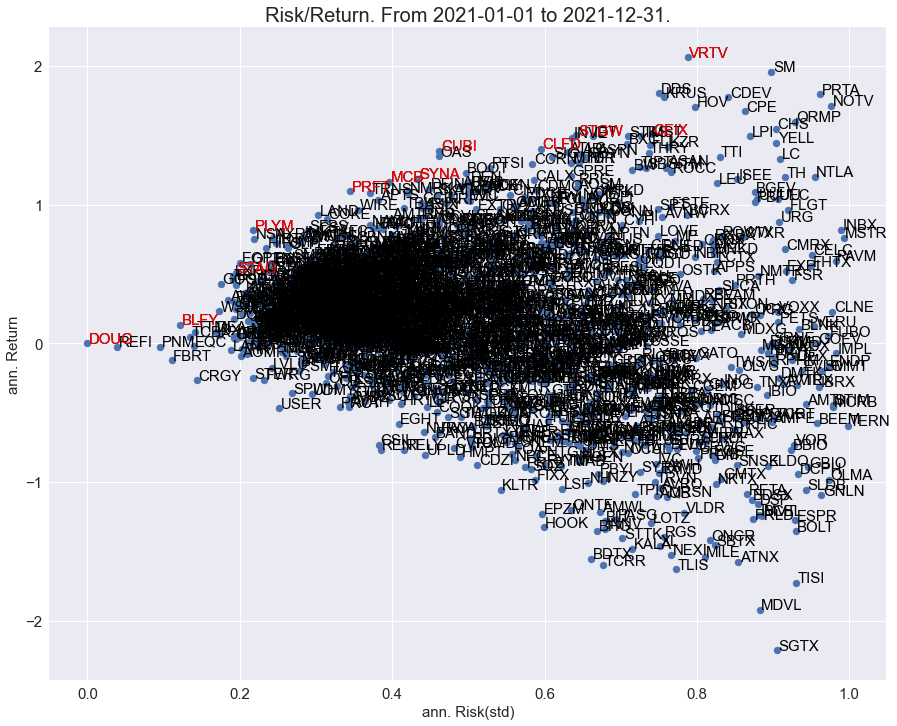

efficient frontier Data Frame
          mean       std
DOUG  0.000000  0.000000
BLFY  0.134931  0.121378
STAG  0.508646  0.194613
PLYM  0.816199  0.217999
PRFT  1.096892  0.344749
MCB   1.163048  0.395921
SYNA  1.185062  0.432932
CUBI  1.387994  0.461865
CLFD  1.401895  0.594862
STGW  1.500012  0.641900
CEIX  1.505919  0.740747
VRTV  2.061575  0.787844


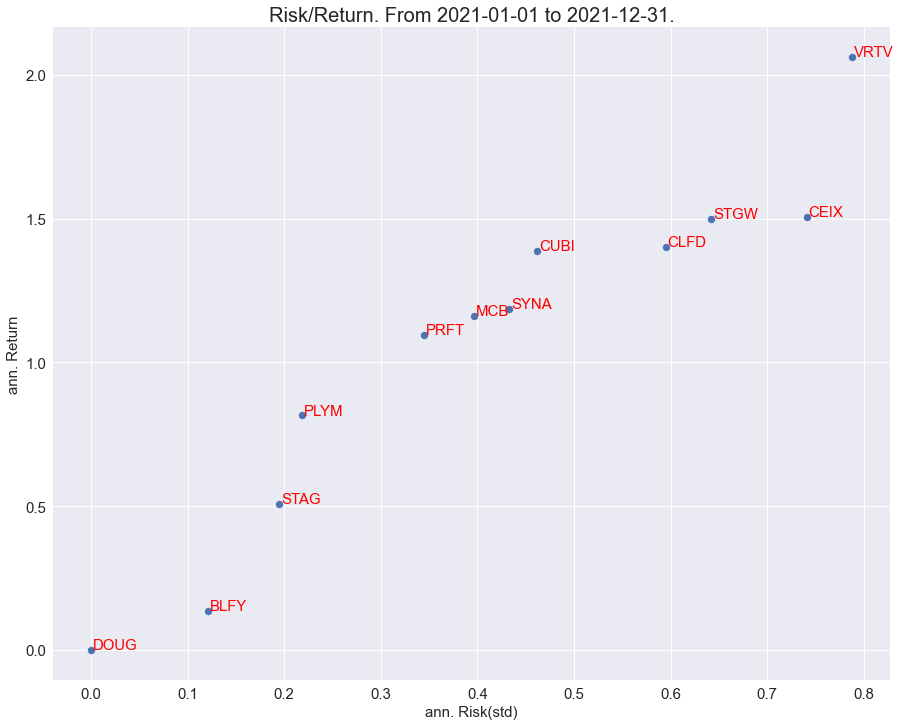

In [6]:

#def function_risk_return(starts,ends,tickers):
#'''They inputs are a startDate and endDate. With those values it is calculated the pair 
#    return/risk for each stock in the sp500
#'''

#tikers = pd.read_csv(filename)
#ticker = list(tikers["Ticker"])

stocks = yf.download(tickers, start = starts, end = ends)


close = stocks.loc[:, "Adj Close"].copy()
close = close.iloc[1: , :]
close.fillna(method='bfill',inplace=True)
close.dropna(axis=1, inplace=True)

ret = close.pct_change()
ret = ret.iloc[1: , :]


summary = ret.describe().T.loc[:, ["mean", "std"]]
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"] * np.sqrt(252)

#Removing any stock with risk higher than 1
summary = summary[summary["std"]<1]

df_border = markowitz_border(summary)

title_plot = "Risk/Return. From" + " " + starts + " to " + ends + "."
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (15,12), s = 50, fontsize = 15)

for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15,color = "black")

for i in df_border.index:
    plt.annotate(i, xy=(df_border.loc[i, "std"]+0.002, df_border.loc[i, "mean"]+0.002), size = 15,color="red")


plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title(title_plot, fontsize = 20)
plt.show()

#
print("efficient frontier Data Frame")
print(df_border)
df_border.plot(kind = "scatter", x = "std", y = "mean", figsize = (15,12), s = 50, fontsize = 15)
for i in df_border.index:
    plt.annotate(i, xy=(df_border.loc[i, "std"]+0.002, df_border.loc[i, "mean"]+0.002), size = 15,color="red")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title(title_plot, fontsize = 20)
plt.show()
